In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Reading CSV file
df = pd.read_csv('C:/Users/Shreya/Documents/ExcelR/Assignments/Assignment1- Basic Stats/sales_data_with_discounts.csv')

In [21]:
# Determining the numerical columns in the dataframe
numerical_cols = df.select_dtypes(include=['number'])
numerical_cols

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [25]:
#Determining Mean Values
mean_values = numerical_cols.mean()
print(mean_values)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64


In [27]:
#Determining Median Values
median_values = numerical_cols.median()
print(median_values)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64


In [29]:
#Determining Mode Values
mode_values = numerical_cols.mode().iloc[0]
print(mode_values)

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


In [33]:
std_values = numerical_cols.std()
print(std_values)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [75]:
#Checking for any null values in dataset. We find that there aren't any null values in the dataset.
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

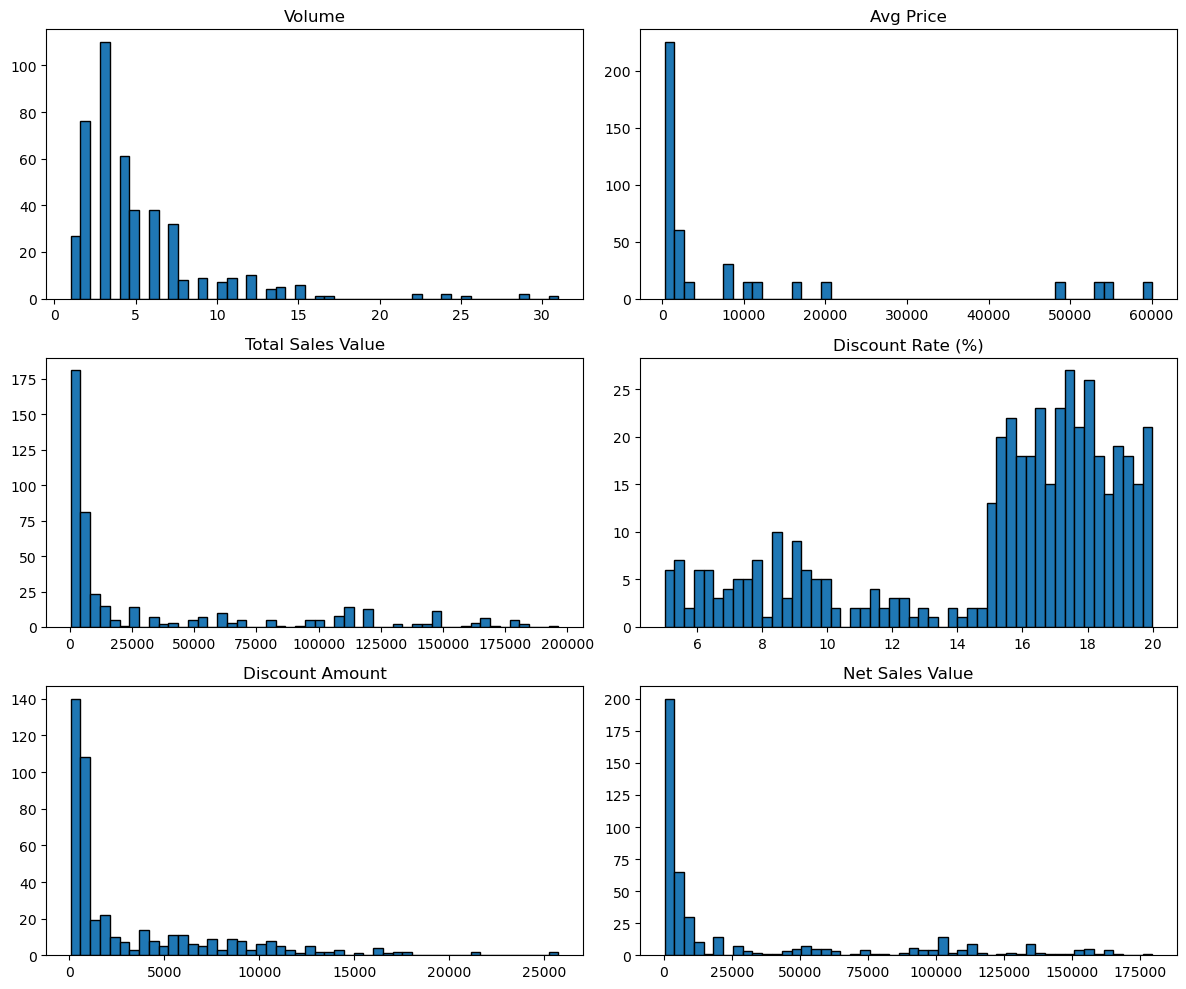

In [53]:
#Ploting histograms for all the numerical columns
numerical_cols[['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']].hist(bins=50, figsize=(12, 10), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

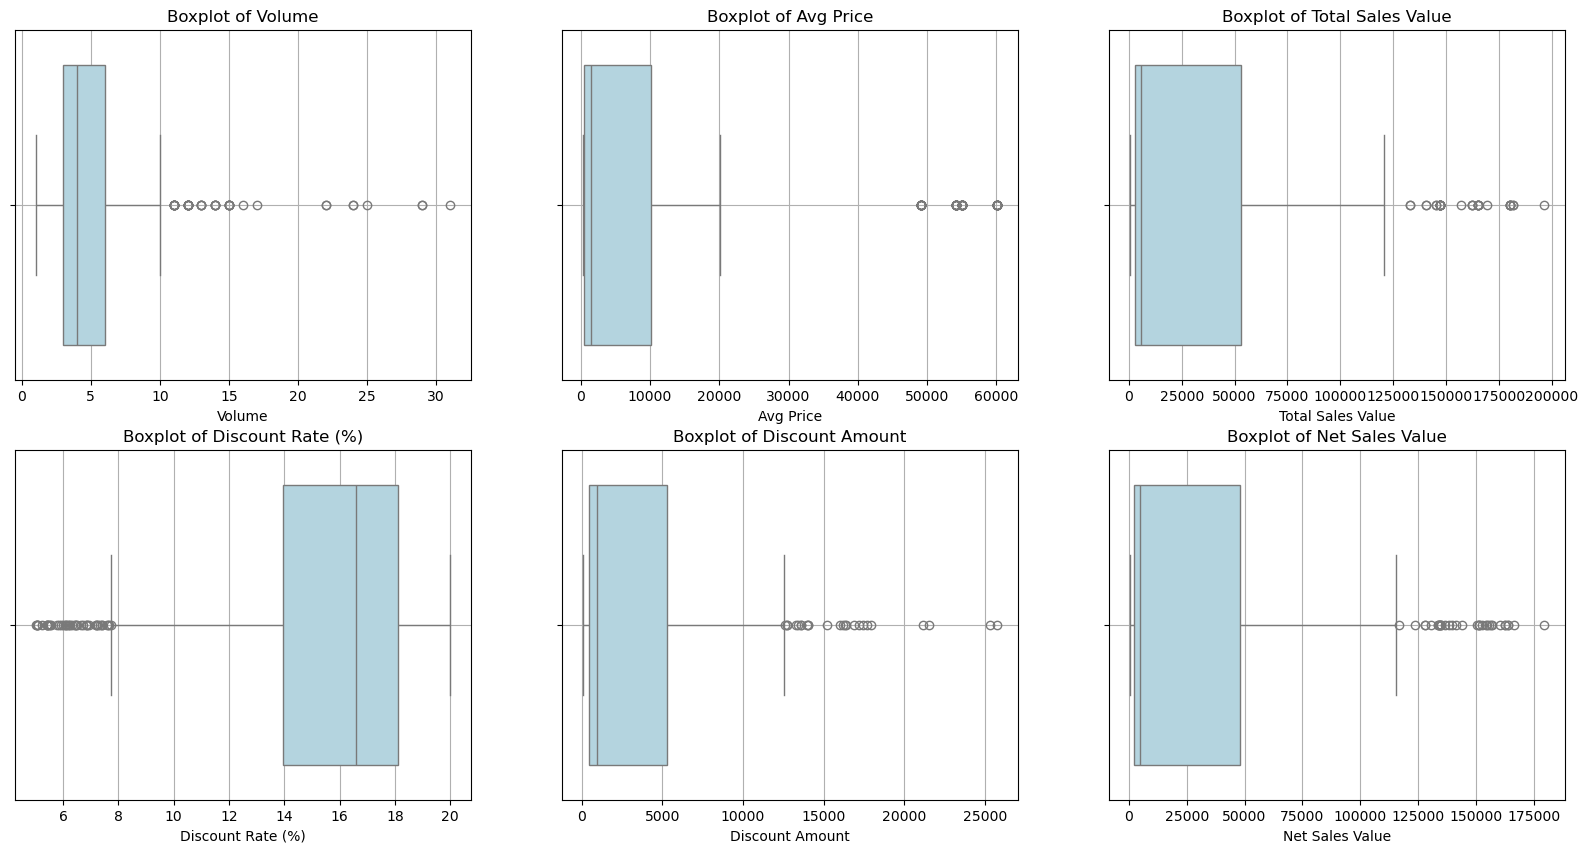

In [83]:
# Set up the plot grid for all combined box plots we have 6 numerical cols
plt.figure(figsize=(20, 10))  # Adjust size as needed
# Loop and plot each numeric column in a subplot
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, idx)  # 2 rows, 3 columns (adjust depending on number of columns)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)


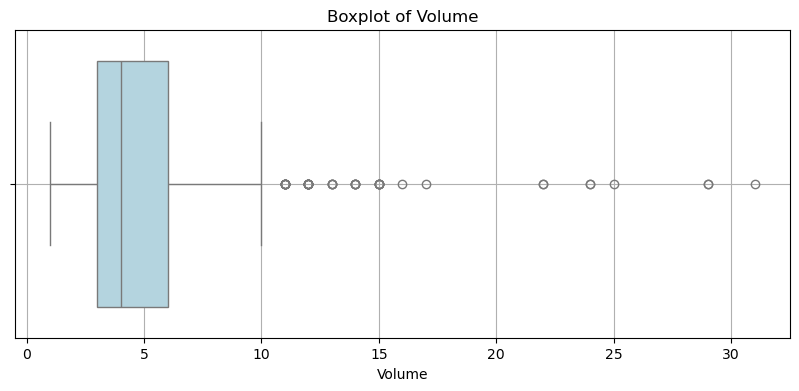

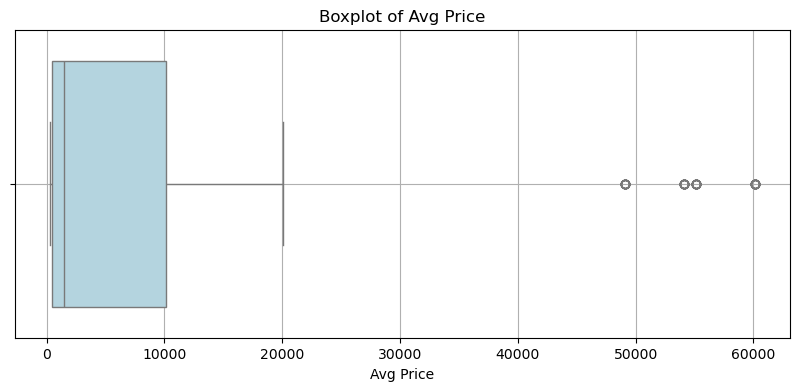

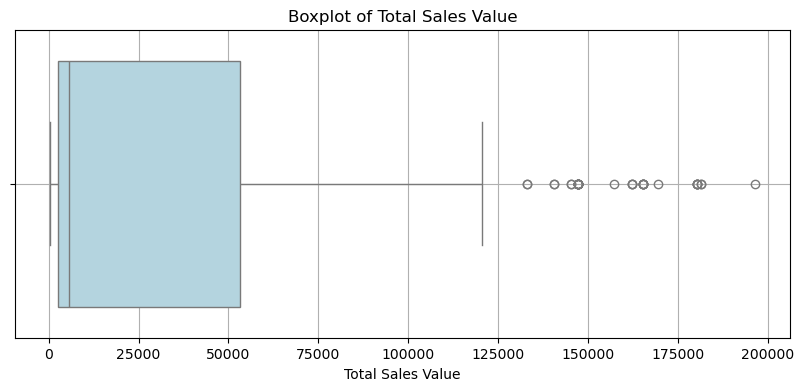

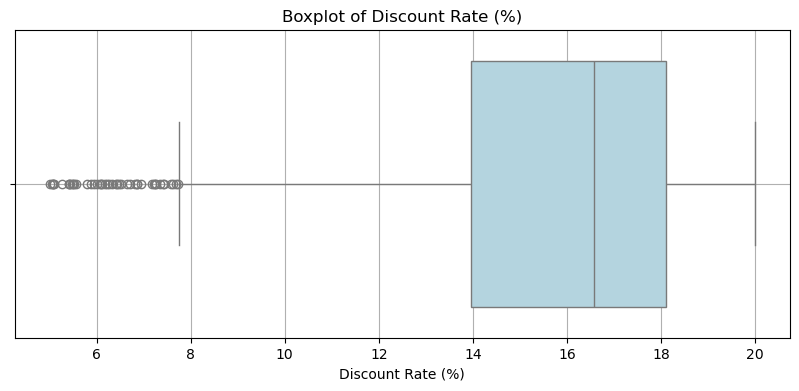

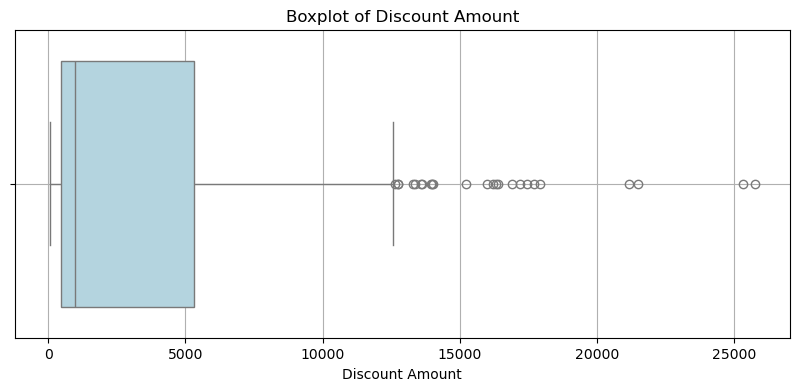

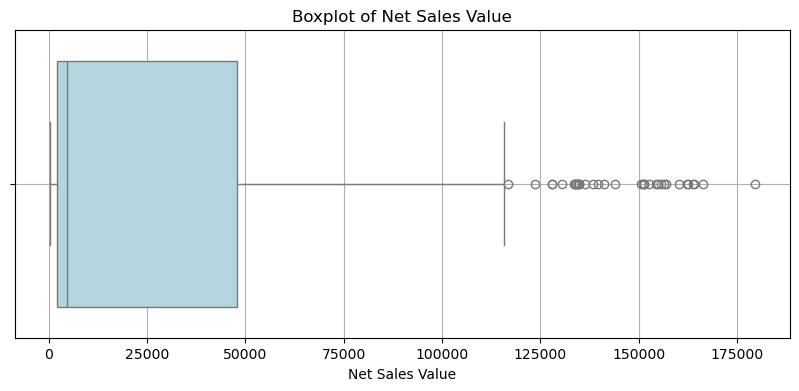

In [87]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

#boxplots for volume,avg price,sales value & discount amount columns show positive skewness and the outliers are also present on the upper half 
#boxplot for discount rate show negative skewness and the outliers are also present on the lower half

In [93]:
# calculating Interquartile Range(IQR)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    #lower bound = Q1 - 1.5 * IQR
    #upper bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    #Printing 1)name of the column 2) Value of the IQR rounded to 2 decimal places 3) number of outliers in that column
    print(f'{col}:\n  IQR = {IQR:.2f}, Outliers = {len(outliers)}') 

Volume:
  IQR = 3.00, Outliers = 44
Avg Price:
  IQR = 9635.00, Outliers = 60
Total Sales Value:
  IQR = 50500.00, Outliers = 36
Discount Rate (%):
  IQR = 4.15, Outliers = 45
Discount Amount:
  IQR = 4856.04, Outliers = 24
Net Sales Value:
  IQR = 45645.70, Outliers = 35


In [95]:
# Find columns with object (string) or category datatype
categorical_cols = df.select_dtypes(include=['object', 'category'])

print("Categorical columns:")
print(categorical_cols)


Categorical columns:
           Date       Day  SKU City         BU  Brand       Model
0    01-04-2021  Thursday  M01    C    Mobiles  RealU       RU-10
1    01-04-2021  Thursday  M02    C    Mobiles  RealU   RU-9 Plus
2    01-04-2021  Thursday  M03    C    Mobiles   YouM       YM-99
3    01-04-2021  Thursday  M04    C    Mobiles   YouM  YM-99 Plus
4    01-04-2021  Thursday  M05    C    Mobiles   YouM      YM-98 
..          ...       ...  ...  ...        ...    ...         ...
445  15-04-2021  Thursday  L06    C  Lifestyle  Jeera   M-Casuals
446  15-04-2021  Thursday  L07    C  Lifestyle   Viva   W-Western
447  15-04-2021  Thursday  L08    C  Lifestyle   Viva    W-Lounge
448  15-04-2021  Thursday  L09    C  Lifestyle  Jeera   M-Formals
449  15-04-2021  Thursday  L10    C  Lifestyle  Jeera     M-Shoes

[450 rows x 7 columns]


C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


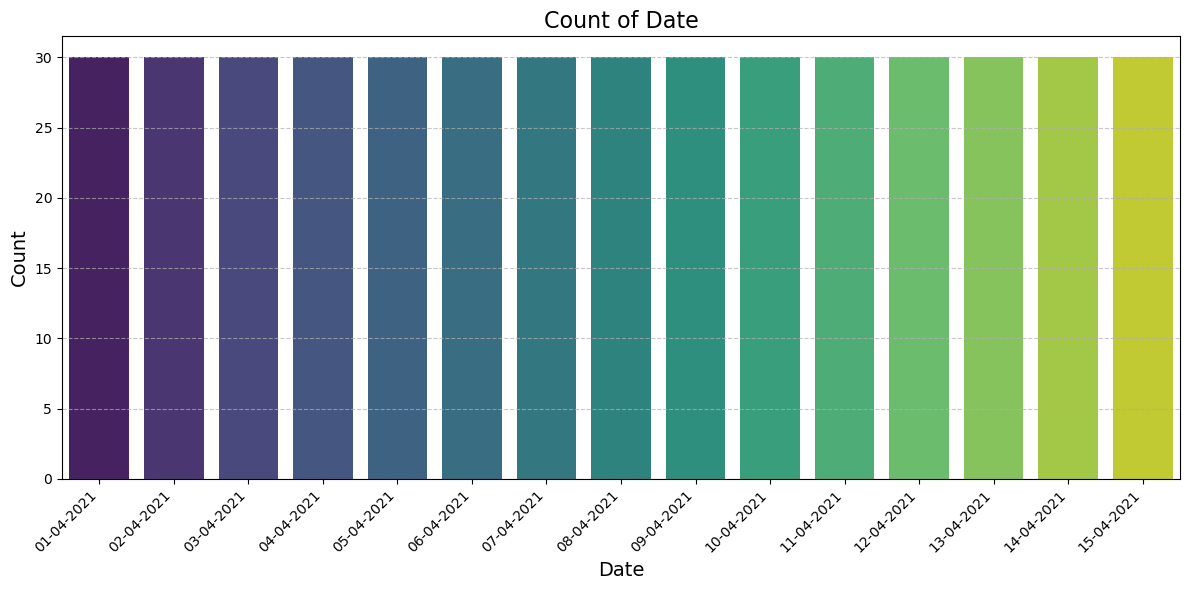

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


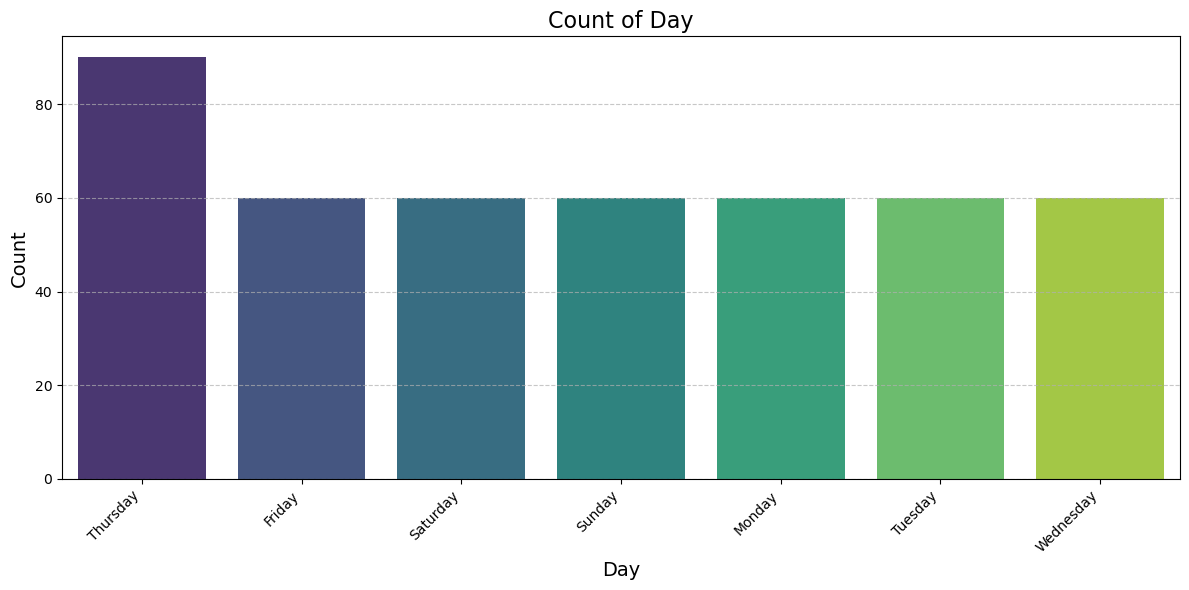

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


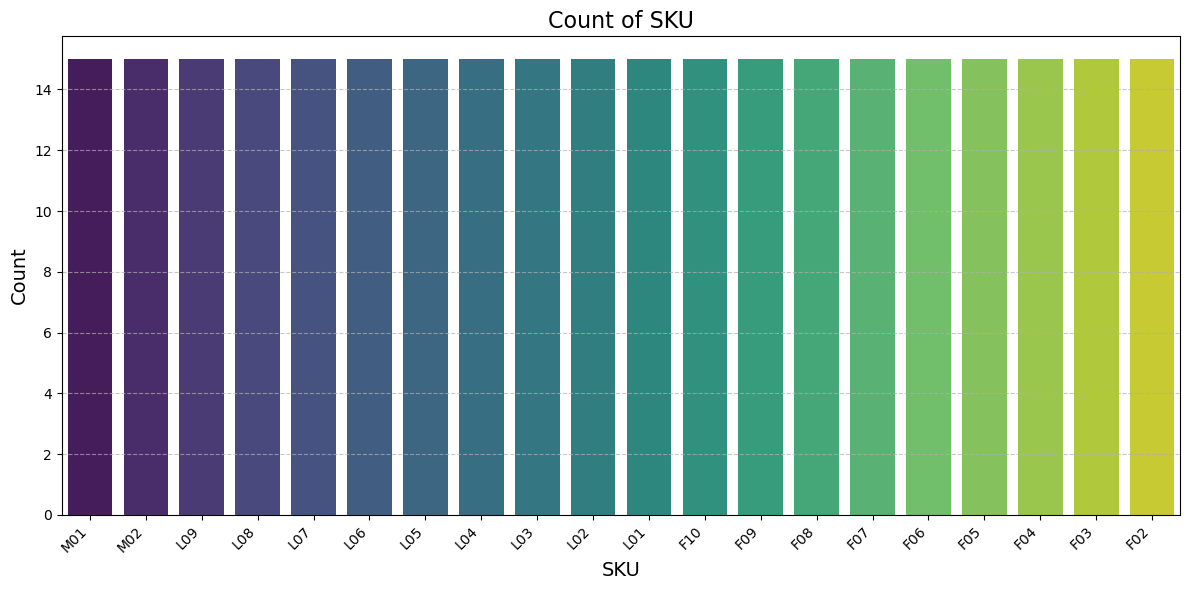

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


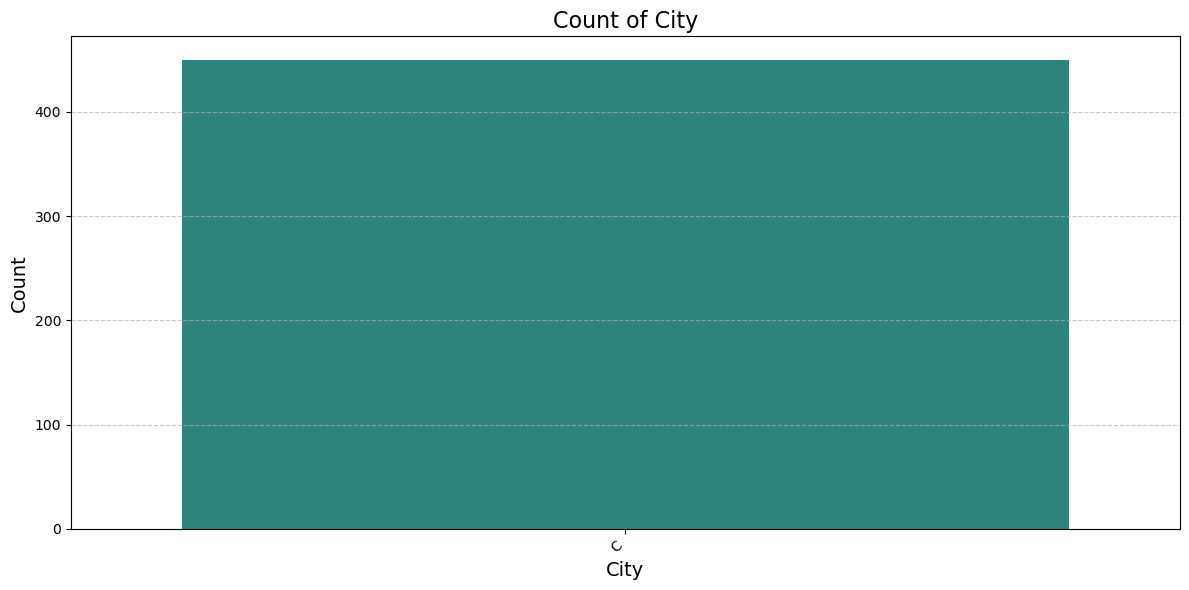

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


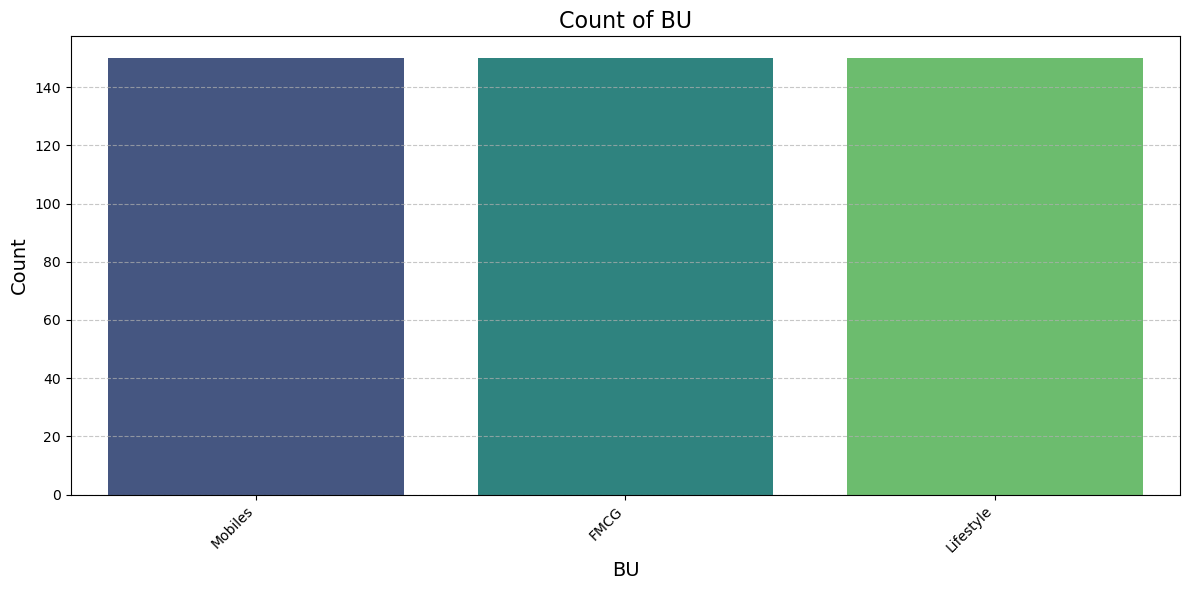

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


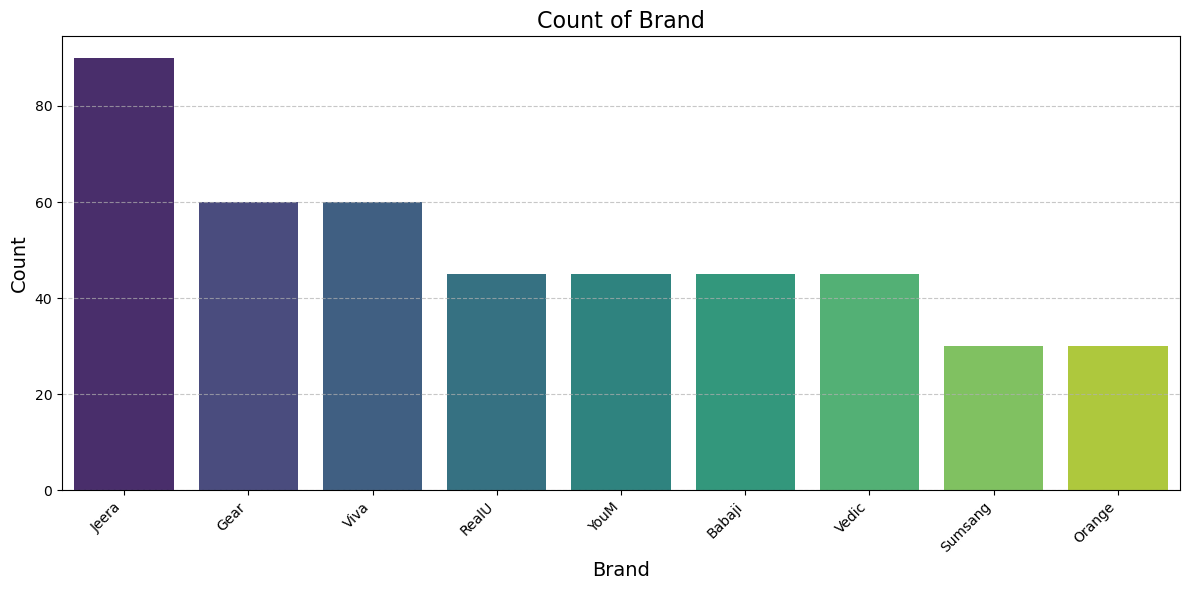

C:\Users\Shreya\AppData\Local\Temp\ipykernel_32732\486115721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


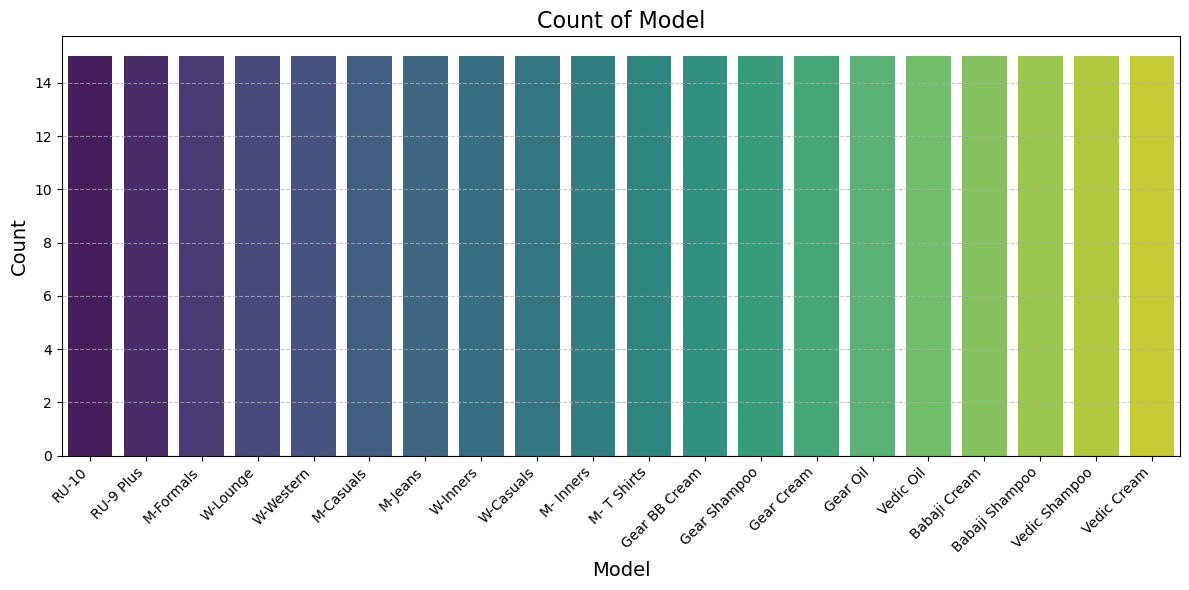

In [109]:
#plotting for categorical columns
for col in categorical_cols:
    # Calculate value counts
    counts = df[col].value_counts()

    # If too many unique categories, show only top 20
    if len(counts) > 20:
        counts = counts[:20]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(f'Count of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [141]:
df1 = pd.DataFrame(numerical_cols)
# Standardizing each numerical column
# We perform standardization (z-score normalization) on the dataset to transform it such that the mean (avg) becomes 0 and standard deviation (spread) becomes 1
# Some features in dataset may have very large value or very small value
# if we want to compare or feed this to machine learning models we would want this to be on similar scale. 
# Standardization makes everything comparable by removing units
# It makes training faster and more stable for ML models. Essential for KNN, PCA, SVM, Logistic Regression. Helps avoid bias.
for col in df1:
    mean = df1[col].mean()
    std = df1[col].std()
    df1[col + '_standardized'] = (df1[col] - mean) / std

print(df1)


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Volum

In [145]:
# Apply one-hot encoding as order of data is not important here
# In machine learning, models do not understand text(categorical variables) they only understand numbers. So we need to convert category type data to numeric.
# we use pandas library (get_dummies) to convert (apply one hot encoding) to Date, Day, SKU, City, BU, Brand, Model columns at once.
# pd.get_dummies() automatically creates new columns for each unique value. Each category becomes its own column, with a 1 indicating presence, and 0 for absence.
# One-hot encoding is a safe, effective way to prepare categorical data for ML. Without it, models can't interpret or use categorical variables properly.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# `drop_first=True` avoids dummy variable trap (optional)
print(df_encoded)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Date_

In [147]:
# Convert boolean (True/False) to integers (1/0)
df_encoded = df_encoded.astype(int)

print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500                 11            21153   
1      10      10100             101000                 11            11676   
2       7      16100             112700                  9            10657   
3       6      20100             120600                  6             8364   
4       3       8100              24300                 17             4372   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0           160346                0                0                0   
1            89323                0                0                0   
2           102042                0                0                0   
3           112235                0                0                0   
4            19927                0                0                0   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                0  ...